 # 🛠 CNC Cost Dataset: Exploration Notebook

 This notebook loads and explores the synthetic CNC dataset.

In [1]:
# 1. Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cnc_data.csv")



In [2]:
# 2. Basic Info
print("🔍 Dataset shape:", df.shape)
print("\n🧱 Column types:\n", df.dtypes)
print("\n🧼 Missing values:\n", df.isnull().sum())
print("\n🔎 Preview of data:\n")
print(df.head())



🔍 Dataset shape: (200, 6)

🧱 Column types:
 Product            object
Material           object
Volume_mm3        float64
Feature_Count       int64
Cycle_Time_min    float64
Quoted_Cost       float64
dtype: object

🧼 Missing values:
 Product           0
Material          0
Volume_mm3        0
Feature_Count     0
Cycle_Time_min    0
Quoted_Cost       0
dtype: int64

🔎 Preview of data:

           Product  Material  Volume_mm3  Feature_Count  Cycle_Time_min  \
0    Spindle Shaft   Plastic   116098.46              5           23.86   
1  Connector Plate  Aluminum    12015.09              6           31.07   
2     Adapter Ring  Aluminum    26250.17              3           24.53   
3       Valve Body     Brass    16440.37              5           40.69   
4    Spindle Shaft   Plastic    15702.03              7           31.38   

   Quoted_Cost  
0      3494.05  
1       624.05  
2      1312.73  
3      1480.53  
4       476.35  


In [3]:
# 3. Descriptive Statistics
print("\n📊 Statistical summary:\n")
print(df.describe())




📊 Statistical summary:

          Volume_mm3  Feature_Count  Cycle_Time_min   Quoted_Cost
count     200.000000     200.000000      200.000000    200.000000
mean    82516.999850       7.355000       33.115450   5623.561150
std     43675.718671       4.139402       15.348752   3689.488107
min     11517.270000       1.000000        5.150000    350.490000
25%     48694.275000       3.750000       19.972500   2472.820000
50%     85719.920000       7.000000       34.470000   4987.160000
75%    123087.012500      11.000000       45.817500   8079.347500
max    149015.070000      14.000000       59.870000  14824.770000


In [4]:
# 4. Value Counts for Material
print("\n📦 Material distribution:\n")
print(df['Material'].value_counts())




📦 Material distribution:

Material
Aluminum    45
Brass       44
Plastic     40
Steel       37
Copper      34
Name: count, dtype: int64


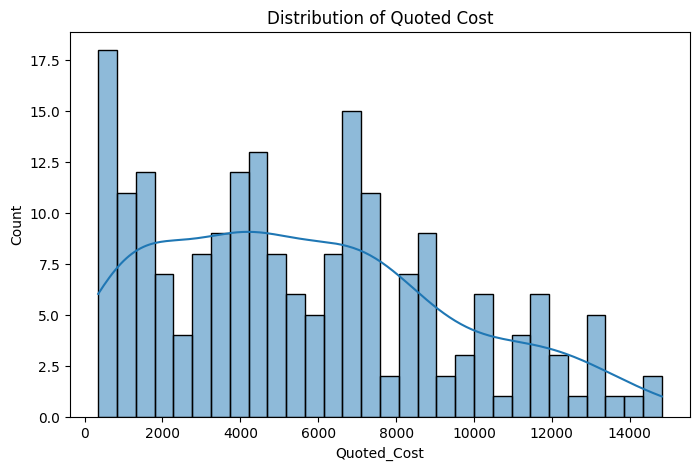

In [5]:
# 5. Distribution of Quoted Cost
plt.figure(figsize=(8, 5))
sns.histplot(df['Quoted_Cost'], bins=30, kde=True)
plt.title("Distribution of Quoted Cost")
plt.show()



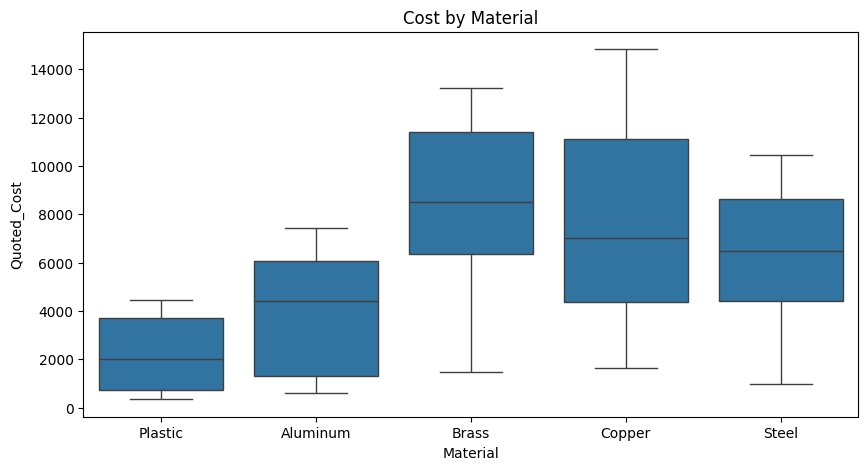

In [6]:
# 6. Boxplot of Cost by Material
plt.figure(figsize=(10, 5))
sns.boxplot(x='Material', y='Quoted_Cost', data=df)
plt.title("Cost by Material")
plt.show()



 # 🧼 CNC Dataset: Cleaning & Preprocessing

 This notebook performs basic data cleaning and preprocessing.

In [7]:
# 1. Load libraries and data
import pandas as pd

# Load your dataset (synthetic or scraped)
df = pd.read_csv("cnc_data.csv")  # Replace with "alibaba_scraped_data.csv" if needed
df.head()



,Product,Material,Volume_mm3,Feature_Count,Cycle_Time_min,Quoted_Cost
0,Spindle Shaft,Plastic,116098.46,5,23.86,3494.05
1,Connector Plate,Aluminum,12015.09,6,31.07,624.05
2,Adapter Ring,Aluminum,26250.17,3,24.53,1312.73
3,Valve Body,Brass,16440.37,5,40.69,1480.53
4,Spindle Shaft,Plastic,15702.03,7,31.38,476.35


In [8]:
# 2. Check for missing values
print("🔎 Missing values:\n", df.isnull().sum())



🔎 Missing values:
 Product           0
Material          0
Volume_mm3        0
Feature_Count     0
Cycle_Time_min    0
Quoted_Cost       0
dtype: int64


In [9]:
# 3. Drop or fill missing values
# Option 1: Drop missing rows
df = df.dropna()

# Option 2 (alternative): Fill missing with forward fill (uncomment if needed)
# df = df.fillna(method='ffill')

print("✅ Data cleaned")



✅ Data cleaned


In [10]:
# 4. Encode categorical column 'Material'
df_encoded = pd.get_dummies(df, columns=['Material'], drop_first=True)
df_encoded.head()



,Product,Volume_mm3,Feature_Count,Cycle_Time_min,Quoted_Cost,Material_Brass,Material_Copper,Material_Plastic,Material_Steel
0,Spindle Shaft,116098.46,5,23.86,3494.05,False,False,True,False
1,Connector Plate,12015.09,6,31.07,624.05,False,False,False,False
2,Adapter Ring,26250.17,3,24.53,1312.73,False,False,False,False
3,Valve Body,16440.37,5,40.69,1480.53,True,False,False,False
4,Spindle Shaft,15702.03,7,31.38,476.35,False,False,True,False


In [11]:
# 5. Check final data types
print("\n📊 Data types:\n", df_encoded.dtypes)




📊 Data types:
 Product              object
Volume_mm3          float64
Feature_Count         int64
Cycle_Time_min      float64
Quoted_Cost         float64
Material_Brass         bool
Material_Copper        bool
Material_Plastic       bool
Material_Steel         bool
dtype: object


In [12]:
# 6. Save cleaned data
df_encoded.to_csv("cleaned_cnc_data.csv", index=False)
print("✅ Cleaned data saved to 'cleaned_cnc_data.csv'")


✅ Cleaned data saved to 'cleaned_cnc_data.csv'


 # 🔧 CNC Dataset: Feature Engineering

 Create new features from existing columns and explore their significance.

In [13]:
# Load libraries and data
import pandas as pd

df = pd.read_csv("cleaned_cnc_data.csv")
df.head()



,Product,Volume_mm3,Feature_Count,Cycle_Time_min,Quoted_Cost,Material_Brass,Material_Copper,Material_Plastic,Material_Steel
0,Spindle Shaft,116098.46,5,23.86,3494.05,False,False,True,False
1,Connector Plate,12015.09,6,31.07,624.05,False,False,False,False
2,Adapter Ring,26250.17,3,24.53,1312.73,False,False,False,False
3,Valve Body,16440.37,5,40.69,1480.53,True,False,False,False
4,Spindle Shaft,15702.03,7,31.38,476.35,False,False,True,False


 ## New Feature 1: Cost per mm³

 "

 This feature normalizes the quoted cost by the volume of the part, giving insight into how cost scales relative to size.



 ```

 Cost_per_mm3 = Quoted_Cost / Volume_mm3

 ```



 It helps identify if larger parts are more cost-efficient or if some parts are priced higher per unit volume.

In [14]:
df['Cost_per_mm3'] = df['Quoted_Cost'] / df['Volume_mm3']
df['Cost_per_mm3'].head()



0    0.030096
1    0.051939
2    0.050008
3    0.090055
4    0.030337
Name: Cost_per_mm3, dtype: float64

 ## New Feature 2: Complexity Index

 "

 This feature combines the feature count and cycle time, reflecting machining complexity and time investment.



 ```

 Complexity_Index = Feature_Count * Cycle_Time_min

 ```



 Higher values suggest more complex parts requiring longer machining, which may affect cost.

In [15]:
df['Complexity_Index'] = df['Feature_Count'] * df['Cycle_Time_min']
df['Complexity_Index'].head()



0    119.30
1    186.42
2     73.59
3    203.45
4    219.66
Name: Complexity_Index, dtype: float64

 ## Initial Insights

 "

 - Parts with higher `Cost_per_mm3` might use more expensive materials or specialized machining.



 - `Complexity_Index` is expected to correlate with `Quoted_Cost` since more complex machining costs more.



 - Further analysis and modeling will confirm these relationships.

In [16]:
# Save the updated dataset
df.to_csv("feature_engineered_cnc_data.csv", index=False)
print("Feature engineered data saved to 'feature_engineered_cnc_data.csv'")


Feature engineered data saved to 'feature_engineered_cnc_data.csv'


 # 📊 CNC Dataset: Visualization & Model Training

 Visualize data and train a model to predict Quoted_Cost.

In [17]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv("feature_engineered_cnc_data.csv")
df.head()


,Product,Volume_mm3,Feature_Count,Cycle_Time_min,Quoted_Cost,Material_Brass,Material_Copper,Material_Plastic,Material_Steel,Cost_per_mm3,Complexity_Index
0,Spindle Shaft,116098.46,5,23.86,3494.05,False,False,True,False,0.030096,119.30
1,Connector Plate,12015.09,6,31.07,624.05,False,False,False,False,0.051939,186.42
2,Adapter Ring,26250.17,3,24.53,1312.73,False,False,False,False,0.050008,73.59
3,Valve Body,16440.37,5,40.69,1480.53,True,False,False,False,0.090055,203.45
4,Spindle Shaft,15702.03,7,31.38,476.35,False,False,True,False,0.030337,219.66


 ## Visualize Quoted Cost Distribution

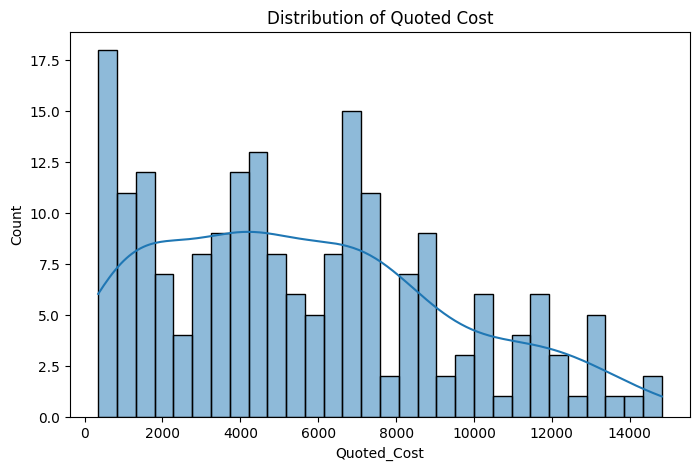

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Quoted_Cost'], bins=30, kde=True)
plt.title("Distribution of Quoted Cost")
plt.show()


 ## Scatter Plot: Quoted Cost vs Volume

In [19]:
print(df.columns)


Index(['Product', 'Volume_mm3', 'Feature_Count', 'Cycle_Time_min',
       'Quoted_Cost', 'Material_Brass', 'Material_Copper', 'Material_Plastic',
       'Material_Steel', 'Cost_per_mm3', 'Complexity_Index'],
      dtype='object')


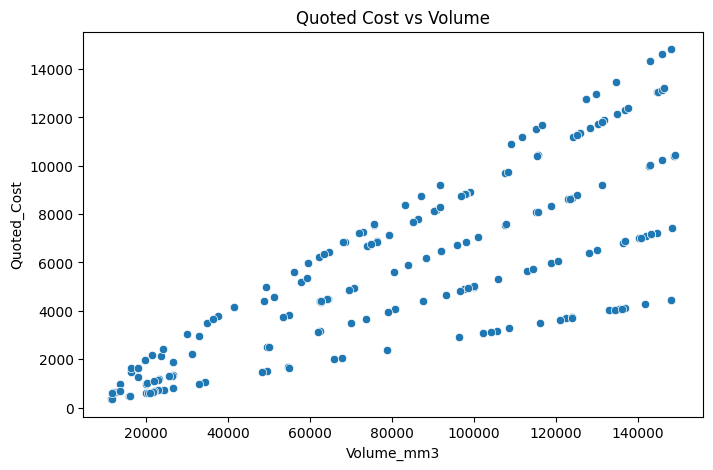

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Volume_mm3', y='Quoted_Cost', data=df)
plt.title("Quoted Cost vs Volume")
plt.show()


 ## Scatter Plot: Quoted Cost vs Complexity Index

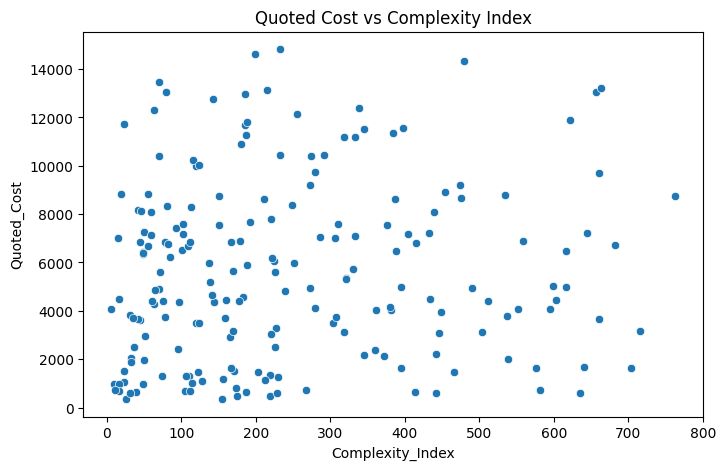

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Complexity_Index', y='Quoted_Cost', data=df)
plt.title("Quoted Cost vs Complexity Index")
plt.show()


 ## Prepare Features and Target

In [22]:
# Drop 'Product' as it's categorical text, keep numeric & encoded columns
X = df.drop(columns=['Quoted_Cost', 'Product'])
y = df['Quoted_Cost']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 ## Train Random Forest Regressor

In [23]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

 ## Evaluate Model Performance

MAE: 460.92
RMSE: 567.64


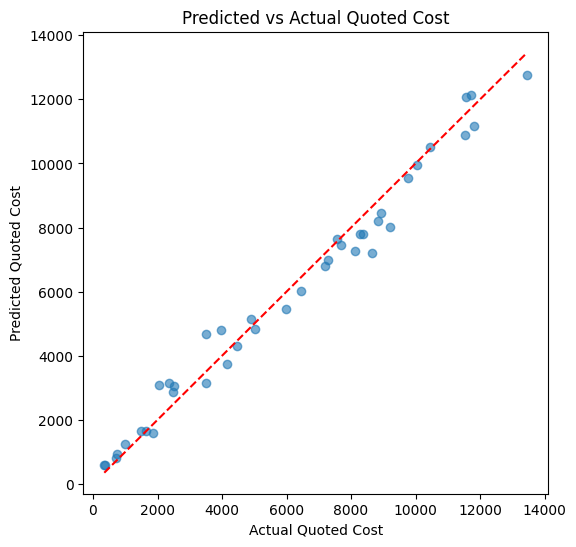

In [24]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Quoted Cost")
plt.ylabel("Predicted Quoted Cost")
plt.title("Predicted vs Actual Quoted Cost")
plt.show()


 ## Feature Importance

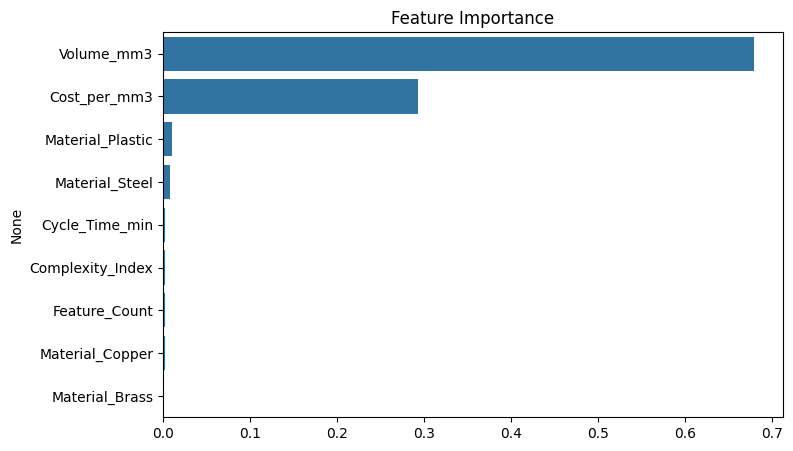

In [25]:
importances = model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Feature Importance")
plt.show()


 # 📘 CNC Costing Project: Final Analysis & Reflection

 Conclude the analysis by reflecting on model performance, challenges, and future improvements.

 ## ✅ What worked well:

 - **Random Forest Regressor** provided reliable performance out of the box.

 - Feature engineering (e.g., `Cost_per_mm3`, `Complexity_Index`) made the model more interpretable and aligned with domain reasoning.

 - Visualizations showed meaningful trends between machining features and cost.



 ## ❗ Challenges:

 - **Web scraping** from Alibaba was difficult due to dynamic content and inconsistent structure.

 - The scraped dataset was limited and required assumptions for volume, features, and material classification.

 - Real-world variables like **tolerance**, **machining type**, and **finish** were missing.



 ## 💡 Future Improvements:

 - Gather more **diverse real-world CNC machining data** from platforms like Xometry, Fictiv, or CNCZone.

 - Include **machining-specific parameters** like tolerance, surface finish, and setup time.

 - Apply **hyperparameter tuning** (e.g., GridSearchCV) or try **regression ensembles** for better predictions.

 - Use domain expertise to classify parts based on complexity tiers.



 ## 🧠 Insights:

 - Feature complexity (Feature_Count × Cycle_Time) appears to drive cost significantly.

 - Parts with higher `Cost_per_mm3` may indicate difficult machining or high-cost materials.

 - Volume alone does not predict cost — complexity and material type are stronger drivers.

